In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import json

In [2]:
tf.__version__
gpu = tf.config.list_physical_devices('GPU')
print(gpu)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


<h3>Loading Dataset</h3>

In [3]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='data_cleaned/Training',
                                                 shuffle=True,
                                                 target_size=(512,512), 
                                                 subset="training",
                                                 class_mode='categorical')
validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='data_cleaned/Validation',
                                                 shuffle=True,
                                                 target_size=(512,512), 
                                                 class_mode='categorical')

Found 5000 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


<h3>Building CNN</h3>

In [4]:
model = tf.keras.models.Sequential([
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = [512,512,3]),
    tf.keras.layers.MaxPooling2D((2,2)),
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(5, activation ='softmax'),
])

#### Visualize: Neural Network Architecture

In [5]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [6]:
history = model.fit(train_dataset, 
                    epochs=30, 
                    validation_data=validation_dataset, 
                    callbacks=callback)

Epoch 1/30
157/157 [==============================] - 73s 462ms/step - loss: 0.3888 - accuracy: 0.5640 - val_loss: 0.2642 - val_accuracy: 0.6960
Epoch 2/30
157/157 [==============================] - 72s 454ms/step - loss: 0.2036 - accuracy: 0.7874 - val_loss: 0.1456 - val_accuracy: 0.9160
Epoch 3/30
157/157 [==============================] - 71s 452ms/step - loss: 0.1358 - accuracy: 0.8800 - val_loss: 0.1105 - val_accuracy: 0.8880
Epoch 4/30
157/157 [==============================] - 72s 456ms/step - loss: 0.0771 - accuracy: 0.9416 - val_loss: 0.0888 - val_accuracy: 0.9360
Epoch 5/30
157/157 [==============================] - 72s 458ms/step - loss: 0.0709 - accuracy: 0.9504 - val_loss: 0.0251 - val_accuracy: 0.9840
Epoch 6/30
157/157 [==============================] - 72s 456ms/step - loss: 0.0187 - accuracy: 0.9908 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 7/30
157/157 [==============================] - 72s 456ms/step - loss: 0.0211 - accuracy: 0.9886 - val_loss: 0.0727 - val_ac

In [20]:
historyname = f'history{len(os.listdir(path="PlotGraphs/History"))+1}.json'
with open(f'PlotGraphs/History/{historyname}', 'w') as f:
    json.dump(history.history, f)

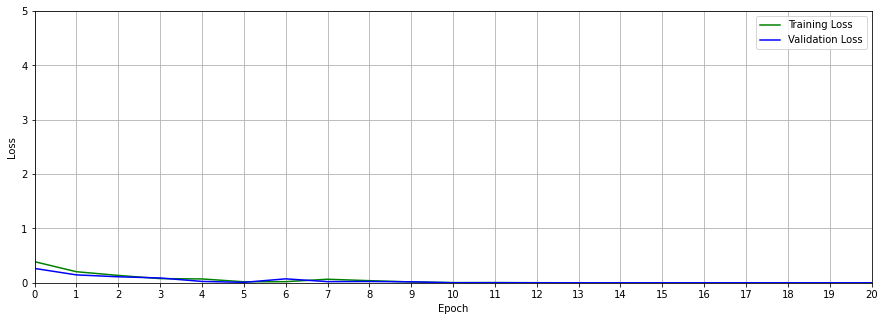

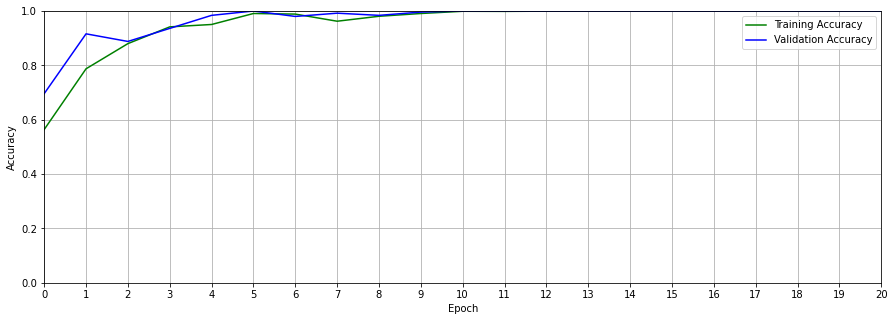

In [7]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):     
    fig, ax = plt.subplots(figsize=(15, 5))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plot_results([loss, val_loss],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"])
 
plot_results([accuracy, val_accuracy], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [8]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

8/8 [==============================] - 2s 221ms/step - loss: 8.2006e-06 - accuracy: 1.0000
Loss:  8.200623597076628e-06
Accuracy:  1.0


In [9]:
modelname = f'modelv{len(os.listdir(path="Model"))+1}.h5'
model.save(f'Model/{modelname}')
print(f"Model Saved: {modelname}")

Model Saved: modelv2.h5
